# # 6_4_Tuning parameters of RF with all

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#load the files

X_train = pd.read_csv('../data/x_y_data/SMOTE/2X_resampled.csv')
y_train = pd.read_csv('../data/x_y_data/SMOTE/2y_resampled.csv')
X_test = pd.read_csv('../data/x_y_data/SMOTE/2X_test.csv')
y_test = pd.read_csv('../data/x_y_data/SMOTE/2y_test.csv')
data = pd.read_csv('../data/cleaned_data/2cleaned_data.csv')

In [3]:
y_train.loc[y_train['churn'] == 'Yes', 'churn'] = 1
y_train.loc[y_train['churn'] == 'No', 'churn'] = 0
y_train['churn'].value_counts()

churn
1    4130
0    4130
Name: count, dtype: int64

In [4]:
y_train['churn'] =y_train['churn'].astype('int64')
y_train['churn'].dtypes

dtype('int64')

In [5]:
y_test.loc[y_test['churn'] == 'Yes', 'churn'] = 1
y_test.loc[y_test['churn'] == 'No', 'churn'] = 0
y_test['churn'].value_counts()

churn
0    1033
1     374
Name: count, dtype: int64

In [6]:
y_test['churn'] =y_test['churn'].astype('int64')
y_test['churn'].dtypes

dtype('int64')

In [7]:
#set the high-parameter
import warnings
from tqdm.auto import tqdm

# Disable warnings
warnings.filterwarnings("ignore")

param_grid = {
    'n_estimators': [75, 100, 125, 150],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_depth': [5, 10, 15, 20],
    'max_features': ['sqrt']  # round(sqrt(#cols))
}

rf = RandomForestClassifier(random_state=12345)

kappa_scorer = make_scorer(cohen_kappa_score)

# Disable tqdm progress bar and set mininterval to suppress messages
with tqdm(total=600, mininterval=1e-9) as pbar:
    grid_search = GridSearchCV(rf, param_grid, cv=5, return_train_score=True,
                               n_jobs=-1, verbose=20, scoring=kappa_scorer)
    grid_search.fit(X_train, y_train)
    pbar.update()  # Make sure progress bar completes

# Enable warnings again
warnings.filterwarnings("default")

grid_search.best_params_  # To check the best set of parameters returned


  0%|          | 0/600 [00:00<?, ?it/s]

Fitting 5 folds for each of 128 candidates, totalling 640 fits


/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 2/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 2/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.627, test=0.536) total time=   1.5s
[CV 1/5; 4/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 4/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.631, test=0.538) total time=   2.6s
[CV 4/5; 5/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75
[CV 4/5; 5/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75;, score=(train=0.592, test=0.591) total time=   1.1s
[CV 5/5; 6/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 1/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 4/5; 1/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.592, test=0.591) total time=   1.0s
[CV 5/5; 2/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 2/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.587, test=0.626) total time=   1.8s
[CV 3/5; 4/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 4/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.591, test=0.579) total time=   2.2s
[CV 4/5; 6/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 1/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 1/5; 1/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.623, test=0.541) total time=   1.0s
[CV 2/5; 3/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 2/5; 3/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.613, test=0.588) total time=   2.3s
[CV 1/5; 5/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75
[CV 1/5; 5/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75;, score=(train=0.624, test=0.540) total time=   1.1s
[CV 5/5; 5/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_l

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 2/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 2/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.615, test=0.588) total time=   1.5s
[CV 4/5; 3/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 4/5; 3/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.591, test=0.592) total time=   2.1s
[CV 3/5; 5/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75
[CV 3/5; 5/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75;, score=(train=0.592, test=0.568) total time=   1.1s
[CV 2/5; 6/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 1/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 3/5; 1/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.592, test=0.568) total time=   1.0s
[CV 3/5; 3/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 3/5; 3/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.585, test=0.571) total time=   2.2s
[CV 4/5; 4/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 4/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.592, test=0.597) total time=   2.2s
[CV 2/5; 7/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 2/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 2/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.588, test=0.574) total time=   1.4s
[CV 5/5; 3/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 5/5; 3/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.587, test=0.622) total time=   2.1s
[CV 2/5; 5/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75
[CV 2/5; 5/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75;, score=(train=0.613, test=0.591) total time=   1.1s
[CV 1/5; 6/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 2/5; 1/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 2/5; 1/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.613, test=0.591) total time=   1.0s
[CV 1/5; 3/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 1/5; 3/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.628, test=0.541) total time=   2.3s
[CV 5/5; 4/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 4/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.592, test=0.631) total time=   2.2s
[CV 1/5; 7/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

##### The parameter {'criterion': 'entropy','max_depth': 20, 'max_features': 'sqrt','min_samples_leaf': 1,'min_samples_split': 2,'n_estimators': 100} was chosen. 

####  Cross validation socre - Kappa-

In [8]:
rf1= RandomForestClassifier(criterion= 'gini',
 max_depth= 20,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 100)

results = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results = cross_val_score(rf1, X_train, y_train, cv=kfold, scoring=kappa_scorer)

results.append(cv_results)
    
msg = f" RF: {cv_results.mean()} ({cv_results.std()})"
print(msg)

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

 RF: 0.3873048836301735 (0.2641317136220576)


### Variable Importance 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


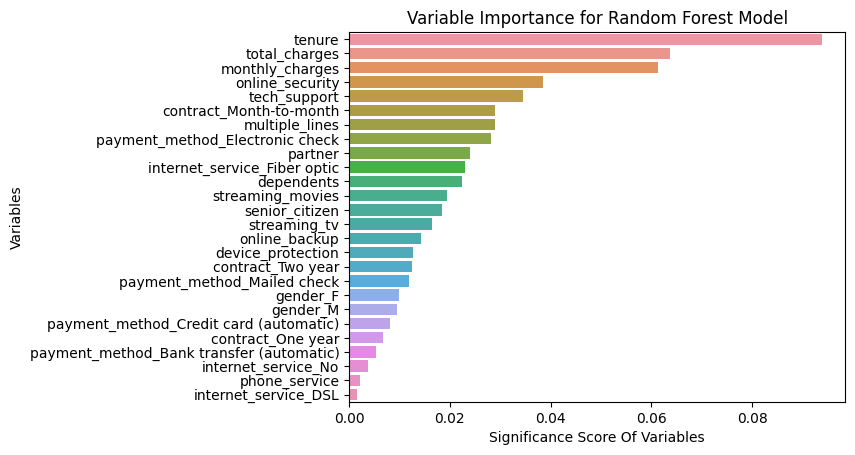

In [9]:
X_train2 = X_train.copy()  
y_train2 = y_train.copy()

rf1= RandomForestClassifier(criterion= 'gini',
 max_depth= 20,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 100)

rf_tuned = rf1.fit(X_train2, y_train2)

from sklearn.inspection import permutation_importance


# Calculate permutation feature importances
result = permutation_importance(rf_tuned, X_train2, y_train2, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_train2.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for Random Forest Model")
plt.show()


In [10]:
feature_importances_df = pd.DataFrame(feature_importances)
feature_importances_df.head()

,0
tenure,0.093753
total_charges,0.063632
monthly_charges,0.061247
online_security,0.038438
tech_support,0.034443


In [11]:
feature_importances_df = feature_importances_df.rename(columns={0:'Significance Score'})
feature_importances_df.head(2)

,Significance Score
tenure,0.093753
total_charges,0.063632


In [12]:
feature_importances_df.T.to_csv('../data/Significant_Score/with_all_T_SMOTE_RF_Significance_Score.csv', index=False)

### the classification report

In [13]:
from sklearn.metrics import confusion_matrix


y_pred = rf1.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[847, 186],
       [155, 219]])

In [14]:
y_pred_df = pd.DataFrame(y_pred)

y_pred_df.value_counts()

0    1002
1     405
Name: count, dtype: int64

In [15]:
y_test_df = pd.DataFrame(y_test)

y_test_df.value_counts()

churn
0        1033
1         374
Name: count, dtype: int64

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


y_pred = rf1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df)

,Metric,Score
0,Accuracy,0.757640
1,Precision,0.540741
2,Recall,0.585561
3,F1-Score,0.562259
4,Kappa,0.395058


[CV 3/5; 83/128] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.774, test=0.684) total time=   4.3s
[CV 5/5; 84/128] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 84/128] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.770, test=0.747) total time=   5.2s
[CV 1/5; 87/128] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=125
[CV 1/5; 87/128] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=125;, score=(train=0.806, test=0.542) total time=   4.3s
[CV 4/5; 88/128] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150
[CV 4/5; 88/128] END criterion=entropy, max_depth

In [17]:
metrics_df.to_csv('../data/metrics/with_all_SMOTE_rf_metrics.csv', index=False)

In [18]:
#further investigation    
import warnings
from tqdm.auto import tqdm


#rf1= RandomForestClassifier(criterion= 'gini',
# max_depth= 20,
# max_features= 'sqrt',
# min_samples_leaf= 1,
# min_samples_split= 2,
# n_estimators= 100)

# Disable warnings
warnings.filterwarnings("ignore")

param_grid = {
    'n_estimators': [100, 125, 150],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2],
    'min_samples_leaf': [1,],
    'max_depth': [20,25,30,35],
    'max_features': ['sqrt']  # round(sqrt(#cols))
}

rf = RandomForestClassifier(random_state=12345)

kappa_scorer = make_scorer(cohen_kappa_score)

# Disable tqdm progress bar and set mininterval to suppress messages
with tqdm(total=600, mininterval=1e-9) as pbar:
    grid_search = GridSearchCV(rf, param_grid, cv=5, return_train_score=True,
                               n_jobs=-1, verbose=20, scoring=kappa_scorer)
    grid_search.fit(X_train, y_train)
    pbar.update()  # Make sure progress bar completes

# Enable warnings again
warnings.filterwarnings("default")

grid_search.best_params_  # To check the best set of parameters returned

  0%|          | 0/600 [00:00<?, ?it/s]

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 125}

[CV 3/5; 2/24] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 3/5; 2/24] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.991, test=0.752) total time=   4.3s
[CV 5/5; 3/24] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 3/24] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.989, test=0.814) total time=   6.0s
[CV 4/5; 5/24] START criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 4/5; 5/24] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.997, test=0.771) total time=   4.1s
[CV 2/5; 7/24] START criterion=gini, max_depth=30, max_features=sqrt, min_sampl

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 125} was chosen

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


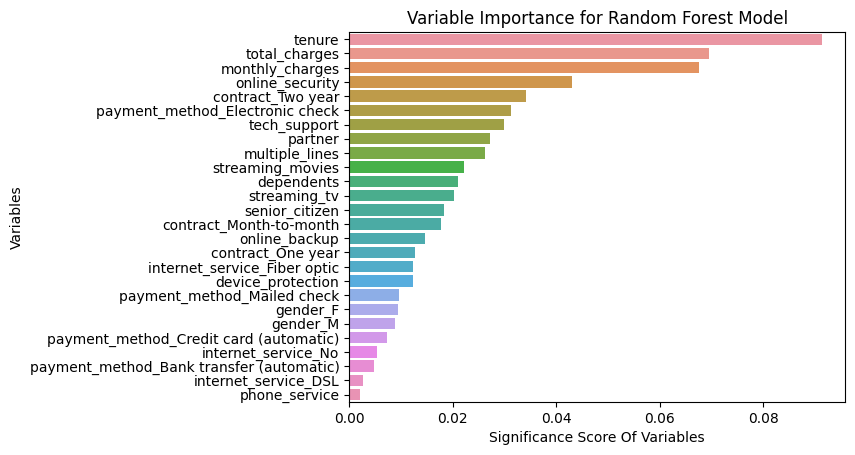

In [19]:
X_train3 = X_train.copy()  
y_train3 = y_train.copy()

rf2= RandomForestClassifier(criterion= 'entropy',
 max_depth= 25,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 125)

rf_tuned2 = rf2.fit(X_train3, y_train3)

from sklearn.inspection import permutation_importance


# Calculate permutation feature importances
result = permutation_importance(rf_tuned2, X_train3, y_train3, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_train2.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for Random Forest Model")
plt.show()

In [20]:
feature_importances_df = pd.DataFrame(feature_importances)
feature_importances_df = feature_importances_df.rename(columns={0:'Significance Score'})
feature_importances_df.T.to_csv('../data/Significant_Score/with_all_T_SMOTE_RF_Significance_Score.csv', index=False)

### the classification report

In [21]:
from sklearn.metrics import confusion_matrix


y_pred2 = rf2.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred2)

print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[856, 177],
       [159, 215]])

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


y_pred2 = rf2.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2= recall_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2)
kappa2 = cohen_kappa_score(y_test, y_pred2)

# Create a DataFrame
metrics_df2 = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy2, precision2, recall2, f12, kappa2]
})

display(metrics_df2)

,Metric,Score
0,Accuracy,0.761194
1,Precision,0.548469
2,Recall,0.574866
3,F1-Score,0.561358
4,Kappa,0.397420


In [26]:
metrics_df2.to_csv('../data/metrics/2with_all_SMOTE_rf_metrics.csv', index=False)